From https://unit8co.github.io/darts/generated_api/darts.models.forecasting.lgbm.html

lags_past_covariates (Union[int, List[int], Dict[str, Union[int, List[int]]], None]) – Lagged past_covariates values used to predict the next time step/s. If an integer, must be > 0. Uses the last n=lags_past_covariates past lags; e.g. (-1, -2, …, -lags), where 0 corresponds to the first predicted time step of each sample. If a list of integers, each value must be < 0. Uses only the specified values as lags. If a dictionary, the keys correspond to the past_covariates component names (of the first series when using multiple series) and the values correspond to the component lags (integer or list of integers). The key ‘default_lags’ can be used to provide default lags for un-specified components. Raises and error if some components are missing and the ‘default_lags’ key is not provided.

lags_future_covariates (Union[Tuple[int, int], List[int], Dict[str, Union[Tuple[int, int], List[int]]], None]) – Lagged future_covariates values used to predict the next time step/s. If a tuple of (past, future), both values must be > 0. Uses the last n=past past lags and n=future future lags; e.g. (-past, -(past - 1), …, -1, 0, 1, …. future - 1), where 0 corresponds the first predicted time step of each sample. If a list of integers, uses only the specified values as lags. If a dictionary, the keys correspond to the future_covariates component names (of the first series when using multiple series) and the values correspond to the component lags (tuple or list of integers). The key ‘default_lags’ can be used to provide default lags for un-specified components. Raises and error if some

In [1]:
from darts.datasets import WeatherDataset
from darts.models import LightGBMModel
series = WeatherDataset().load()
# predicting atmospheric pressure
target = series['p (mbar)'][:100]

# optionally, use past observed rainfall (pretending to be unknown beyond index 100)
#past_cov = series['rain (mm)'][:100]
# optionally, use future temperatures (pretending this component is a forecast)
#future_cov = series['T (degC)'][:106]
# predict 6 pressure values using the 12 past values of pressure and rainfall, as well as the 6 temperature
# values corresponding to the forecasted period

'''
model = LightGBMModel(
    lags=12,
    lags_past_covariates=12,
    lags_future_covariates=[0,1,2,3,4,5],
    output_chunk_length=6,
    verbose=-1
)
model.fit(target, past_covariates=past_cov, future_covariates=future_cov)
'''
output_chunk_length = 6
model = LightGBMModel(
    lags=12,   
    output_chunk_length=output_chunk_length,
    verbose=1
)
validation_length = 24
model.fit(target[:100 - validation_length], val_series=target[100-validation_length:])

Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/home/mahdi/anaconda3/envs/darts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 59, number of used features: 12
[LightGBM] [Info] Start training from score 1008.119491
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LightGBMModel(lags=12, lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=6, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True, categorical_past_covariates=None, categorical_future_covariates=None, categorical_static_covariates=None, verbose=1)

<Axes: xlabel='Date Time'>

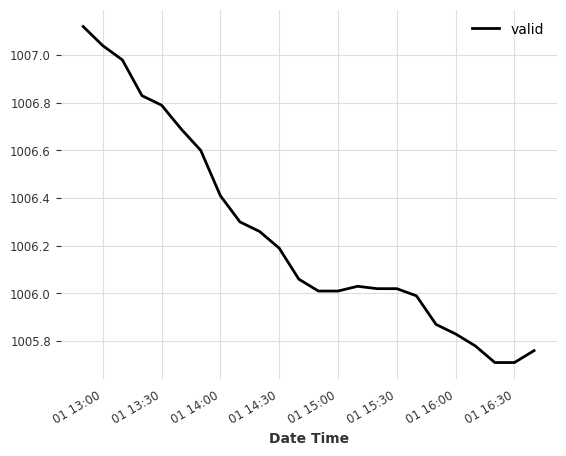

In [8]:
target[100-validation_length:].plot(label='valid')


<Axes: xlabel='Date Time'>

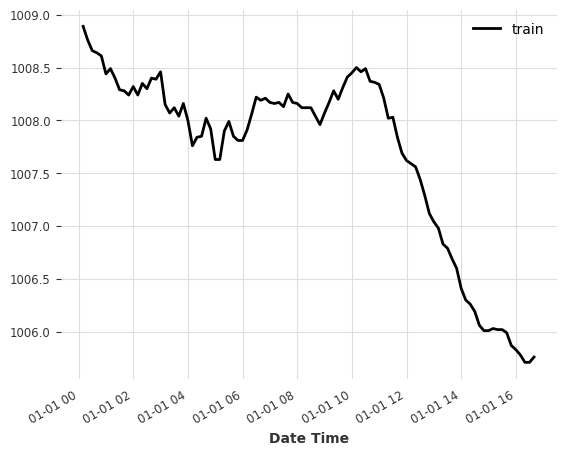

In [9]:
target.plot(label='train')

In [3]:
pred = model.predict(6)
pred.values()

array([[1007.86220958],
       [1007.84488682],
       [1007.84516202],
       [1007.9022548 ],
       [1007.96928298],
       [1008.06735955]])

<Axes: xlabel='Date Time'>

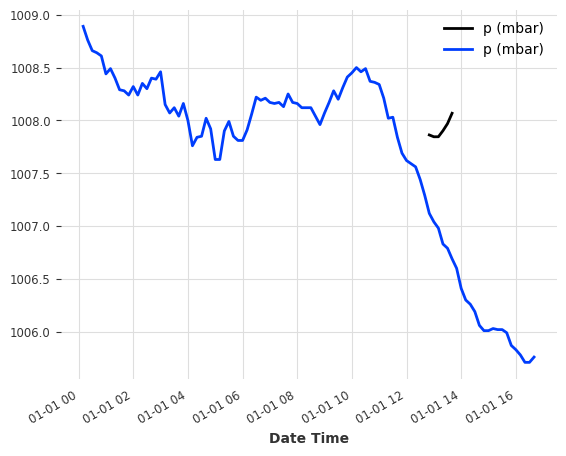

In [4]:
pred.plot()
target.plot()

In [5]:
tmp = model.historical_forecasts(target)

`enable_optimization=True` is ignored because `retrain` is not `False`To hide this warning, set `show_warnings=False` or `enable_optimization=False`.


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 1008.294983
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the sp

<Axes: xlabel='Date Time'>

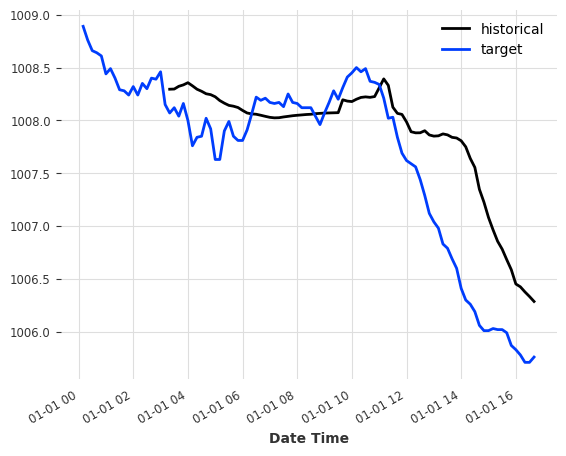

In [6]:
tmp.plot(label="historical")
target.plot(label="target")